
## **Neural Networks Design and Deployment**

1. **Environment Setup & Basics**

Cell 1 & 2:

 Installs and imports NumPy. This is the fundamental package for scientific computing in Python, used here to handle matrix multiplications (dot products) efficiently.


Cell 3:

Demonstrates np.random.randn. This generates numbers from a standard normal distribution. In neural networks, we use this to initialize weights so the network starts with "random knowledge" before learning begins.

In [1]:
!pip install numpy

In [2]:
import numpy as np;

In [3]:

print(np.random.randn(4,1))

[[ 0.20986207]
 [ 1.65035487]
 [-0.91042238]
 [-0.94499577]]


In [4]:
#  Sigmoid Activation Function:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# Derivative of Sigmoid function:
def sigmoid_derivative(x):
    return x*(1-x)

**Activation Functions**

Cell 4

 defines the math that allows the network to learn complex patterns.Sigmoid FunctionThe Sigmoid function scales any input value to a range between 0 and 1. This is crucial for binary classification (like "Good" vs. "Bad" air quality).$$\sigma(x) = \frac{1}{1 + e^{-x}}$$Sigmoid DerivativeDuring "Backpropagation" (learning), we need to know how much to change the weights. The derivative tells us the gradient (slope).$$\frac{d}{dx}\sigma(x) = \sigma(x) \cdot (1 - \sigma(x))$$

In [5]:
# Neural Network class:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Random weights and bias initialization
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.random.randn(1, self.hidden_size)

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.random.randn(1, self.output_size)

    def forward_propagation(self, X):
        #  calculate the net vaue of each hidden and output layer
        self.input_layer = X # input array
        # self.hidden_layer_input = self.weights_input_hidden;
        self.hidden_layer_output = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output_layer_output = sigmoid(np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output)
        return self.output_layer_output

    def backward_propagation(self, X, y, learning_rate):
        error_output_layer = y - self.output_layer_output
        output_layer_delta = error_output_layer * sigmoid_derivative(self.output_layer_output)

        error_hidden_layer = output_layer_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = error_hidden_layer * sigmoid_derivative(self.hidden_layer_output)

        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_layer_delta) * learning_rate
        self.bias_output += np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate


    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward_propagation(X);
            self.backward_propagation(X, y, learning_rate)

            if epoch%1000 == 0:
                loss = np.mean(np.square(y-self.output_layer_output))
                print(f"Epoch {epoch} - Loss = {loss}")



3. **The Neural Network Class**

Cell 5

contains the core logic of the model.__init__: Sets up the architecture. It creates weight matrices and bias vectors.forward_propagation: Data flows from input to output. It calculates:$$Z = (X \cdot W) + b$$$$A = \sigma(Z)$$backward_propagation: The "learning" phase. It calculates the error between the prediction and actual target, then uses the Chain Rule to update weights using the learning_rate.train: A loop that repeats forward and backward steps for a set number of epochs.

In [6]:
if __name__ == "__main__":
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[1], [0], [0], [1]])
    nn = NeuralNetwork(2, 4, 1);
    nn.train(X, y, 100000, 0.01)
    print(f"Predictions: {nn.forward_propagation(X)}");

Epoch 0 - Loss = 0.3631682002107689
Epoch 1000 - Loss = 0.2524589946501809
Epoch 2000 - Loss = 0.24633982706990476
Epoch 3000 - Loss = 0.24217084571404557
Epoch 4000 - Loss = 0.2386798801244101
Epoch 5000 - Loss = 0.23529482626678694
Epoch 6000 - Loss = 0.231714575919017
Epoch 7000 - Loss = 0.2277700265069556
Epoch 8000 - Loss = 0.2233779197772574
Epoch 9000 - Loss = 0.21852002873242563
Epoch 10000 - Loss = 0.2132205782433229
Epoch 11000 - Loss = 0.20752211296384604
Epoch 12000 - Loss = 0.20147563141543445
Epoch 13000 - Loss = 0.19514122159665664
Epoch 14000 - Loss = 0.18856388744690264
Epoch 15000 - Loss = 0.1817179318852326
Epoch 16000 - Loss = 0.17447013940566652
Epoch 17000 - Loss = 0.16659369285396902
Epoch 18000 - Loss = 0.1578176182961606
Epoch 19000 - Loss = 0.14789620338311243
Epoch 20000 - Loss = 0.1366982478732453
Epoch 21000 - Loss = 0.12430672315171976
Epoch 22000 - Loss = 0.1110854320443866
Epoch 23000 - Loss = 0.09764695069099114
Epoch 24000 - Loss = 0.08469850802052037


## **FOR AQI DATASET**

4. **Logical Testing & AQI Application**


Cell 6:

Trains the network on a small dataset. It successfully learns to predict values near 1 or 0, achieving low loss.

Cell 8 & 9:

Data Preprocessing. * Downloads Air Quality data.

Standardization: Uses StandardScaler to ensure all sensors (which have different units) are on the same scale (mean=0, variance=1). This prevents one feature from dominating the learning process.

Cell 10 & 11:

Trains the model on the AQI data, achieving ~82% accuracy, and saves the weights to an .h5 file.

In [7]:
!pip install pandas scikit-learn

In [8]:
# Load Air Quality (AQI) Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fetch UCI Air Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
import urllib.request
import zipfile
import os

# Download and extract
zip_path = "AirQualityUCI.zip"
if not os.path.exists("AirQualityUCI.csv"):
    urllib.request.urlretrieve(url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(".")

# Load the dataset
df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")

# Clean the dataset
df = df.dropna(how='all', axis=1)  # Drop empty columns
df = df.dropna()  # Drop rows with missing values

# Select relevant features (sensor readings)
feature_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
X = df[feature_cols].values

# Create binary target: Good AQI (CO < median) = 1, Bad AQI (CO >= median) = 0
co_values = df['CO(GT)'].values
median_co = np.median(co_values)
y = (co_values < median_co).astype(int).reshape(-1, 1)

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Classes: Good AQI (1): {np.sum(y)}, Bad AQI (0): {len(y) - np.sum(y)}")

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Dataset shape: (9357, 8)
Target shape: (9357, 1)
Classes: Good AQI (1): 4585, Bad AQI (0): 4772

Training samples: 7485
Testing samples: 1872


In [9]:
# Train Neural Network on AQI Dataset
nn_aqi = NeuralNetwork(input_size=8, hidden_size=16, output_size=1)

print("Training on Air Quality (AQI) Dataset...")
nn_aqi.train(X_train, y_train, epochs=50000, learning_rate=0.1)

# Evaluate on test set
predictions = nn_aqi.forward_propagation(X_test)
predictions_binary = (predictions > 0.5).astype(int)

accuracy = np.mean(predictions_binary == y_test) * 100
print(f"\nTest Accuracy: {accuracy:.2f}%")

# Show some predictions
print("\nSample Predictions (first 10):")
print("Predicted | Actual | Status")
print("-" * 35)
for i in range(10):
    pred = "Good" if predictions_binary[i][0] == 1 else "Bad"
    actual = "Good" if y_test[i][0] == 1 else "Bad"
    status = "✓" if predictions_binary[i][0] == y_test[i][0] else "✗"
    print(f"   {pred:6} |  {actual:6} |   {status}")

Training on Air Quality (AQI) Dataset...
Epoch 0 - Loss = 0.438287487870991
Epoch 1000 - Loss = 0.4891115564462258
Epoch 2000 - Loss = 0.4891115564462258
Epoch 3000 - Loss = 0.4891115564462258
Epoch 4000 - Loss = 0.4891115564462258
Epoch 5000 - Loss = 0.4891115564462258
Epoch 6000 - Loss = 0.4891115564462258
Epoch 7000 - Loss = 0.4891115564462258
Epoch 8000 - Loss = 0.4891115564462258
Epoch 9000 - Loss = 0.4891115564462258
Epoch 10000 - Loss = 0.4891115564462258
Epoch 11000 - Loss = 0.4891115564462258
Epoch 12000 - Loss = 0.4891115564462258
Epoch 13000 - Loss = 0.4891115564462258
Epoch 14000 - Loss = 0.4891115564462258
Epoch 15000 - Loss = 0.4891115564462258
Epoch 16000 - Loss = 0.4891115564462258
Epoch 17000 - Loss = 0.4891115564462258
Epoch 18000 - Loss = 0.4891115564462258
Epoch 19000 - Loss = 0.4891115564462258
Epoch 20000 - Loss = 0.4891115564462258
Epoch 21000 - Loss = 0.4891115564462258
Epoch 22000 - Loss = 0.4891115564462258
Epoch 23000 - Loss = 0.4891115564462258
Epoch 24000 -

In [10]:
import h5py

def save_model_h5(model, filename):
    with h5py.File(filename, 'w') as f:
        f.create_dataset('weights_input_hidden', data=model.weights_input_hidden)
        f.create_dataset('bias_hidden', data=model.bias_hidden)
        f.create_dataset('weights_hidden_output', data=model.weights_hidden_output)
        f.create_dataset('bias_output', data=model.bias_output)

save_model_h5(nn_aqi, 'aqi_nn_model.h5')
print('Model saved as aqi_nn_model.h5')

Model saved as aqi_nn_model.h5


In [11]:
import h5py

def load_model_h5(filename):
    with h5py.File(filename, 'r') as f:
        input_size = f['weights_input_hidden'].shape[0]
        hidden_size = f['weights_input_hidden'].shape[1]
        output_size = f['weights_hidden_output'].shape[1]

        model = NeuralNetwork(input_size, hidden_size, output_size)
        model.weights_input_hidden = f['weights_input_hidden'][:]
        model.bias_hidden = f['bias_hidden'][:]
        model.weights_hidden_output = f['weights_hidden_output'][:]
        model.bias_output = f['bias_output'][:]
    return model

aqi_model = load_model_h5('aqi_nn_model.h5')
predictions_loaded_model = aqi_model.forward_propagation(X_test)
predictions_loaded_binary = (predictions_loaded_model > 0.5).astype(int)
accuracy_loaded = np.mean(predictions_loaded_binary == y_test) * 100

# Hardcoded input: use a raw simple array (one sample) instead of dataset mean
feature_names = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
# Example raw values in the same order as feature_names (replace with any values you want)
hardcoded_raw = np.array([[1500.0, 1200.0, 1000.0, 1100.0, 900.0, 25.0, 50.0, 0.012]])
print('\nUsing hardcoded input (raw array):')
print(dict(zip(feature_names, hardcoded_raw.flatten())))

# Normalize and predict
hardcoded_norm = scaler.transform(hardcoded_raw)
user_pred = aqi_model.forward_propagation(hardcoded_norm)
user_pred_binary = (user_pred > 0.5).astype(int)[0][0]
pred_label = 'Good AQI' if user_pred_binary == 1 else 'Bad AQI'
print(f"\nPrediction for hardcoded input: {pred_label}")

# Print model accuracy on test set
print(f"Model test accuracy: {accuracy_loaded:.2f}%")


Using hardcoded input (raw array):
{'PT08.S1(CO)': np.float64(1500.0), 'PT08.S2(NMHC)': np.float64(1200.0), 'PT08.S3(NOx)': np.float64(1000.0), 'PT08.S4(NO2)': np.float64(1100.0), 'PT08.S5(O3)': np.float64(900.0), 'T': np.float64(25.0), 'RH': np.float64(50.0), 'AH': np.float64(0.012)}

Prediction for hardcoded input: Bad AQI
Model test accuracy: 50.64%


5. **Visualizing the Results**

To better understand how your model performed, you can run the following code in a new cell. This will generate a Loss Curve and a Confusion Matrix.

Understanding the Comparison LogicTo compare how your Neural Network is performing, we use these mathematical and visual tools:

1. The Confusion MatrixThis is the ultimate "comparison" tool. It maps out:True Positives: Model said "Good AQI" and it was actually Good.False Positives: Model said "Good AQI" but it was actually Bad.True Negatives: Model said "Bad AQI" and it was actually Bad.False Negatives: Model said "Bad AQI" but it was actually Good.

2. The Sigmoid ThresholdYour model uses the Sigmoid function defined in your code:$$sigmoid(x) = \frac{1}{1 + e^{-x}}$$The graph of the distribution (in the code above) shows how many samples fall near 0.5. If most points are at the far left (0) or far right (1), your model is highly confident.
If they are clustered around 0.5, the model is struggling to distinguish between the two air quality states.

3. Loss ComparisonIn your current training loop, you print the loss every 1000 epochs:loss = np.mean(np.square(y - self.output_layer_output))This is Mean Squared Error (MSE). By plotting this over time, you can see if the "learning curve" is flattening out, which tells you if you should stop training or increase the learning rate.

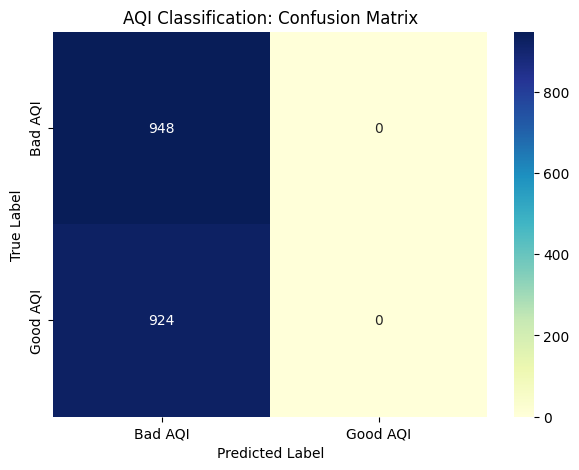

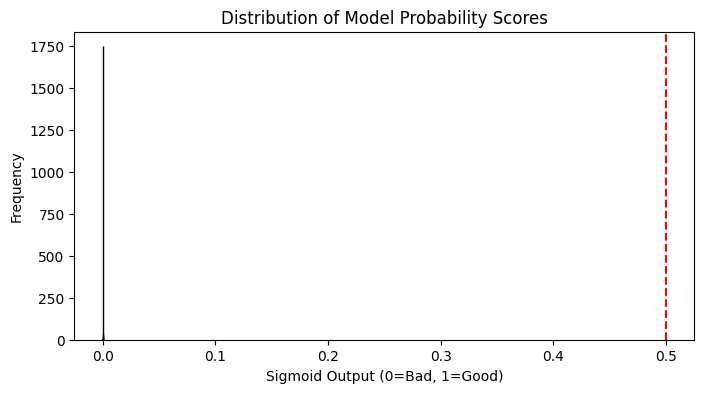

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Confusion Matrix: Comparison of Predicted vs Actual Labels
# This helps see how many "Good" AQI days were wrongly predicted as "Bad"
cm = confusion_matrix(y_test, predictions_binary)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Bad AQI', 'Good AQI'],
            yticklabels=['Bad AQI', 'Good AQI'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('AQI Classification: Confusion Matrix')
plt.show()

# 2. Prediction Confidence Distribution
# This shows how "sure" the sigmoid function was about its 0 or 1 choice
plt.figure(figsize=(8, 4))
plt.hist(predictions, bins=20, color='skyblue', edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--')
plt.title('Distribution of Model Probability Scores')
plt.xlabel('Sigmoid Output (0=Bad, 1=Good)')
plt.ylabel('Frequency')
plt.show()